In [ ]:
!pip install numpy pandas-profiling matplotlib seaborn --quiet

In [ ]:
!pip install opendatasets xgboost graphviz lightgbm scikit-learn xgboost lightgbm --upgrade --quiet

In [ ]:
import os
import opendatasets as od
import pandas as pd
pd.set_option('display.max_columns', 120)
pd.set_option('display.max_rows', 120)

In [ ]:
od.download('https://www.kaggle.com/c/rossmann-store-sales')

Skipping, found downloaded files in "./rossmann-store-sales" (use force=True to force download)


In [ ]:
os.listdir('rossmann-store-sales')

['store.csv', 'sample_submission.csv', 'train.csv', 'test.csv']

In [ ]:
ross_df = pd.read_csv('rossmann-store-sales/train.csv', low_memory = False)
store_df = pd.read_csv('rossmann-store-sales/store.csv')
test_df = pd.read_csv('rossmann-store-sales/test.csv')
submission_df = pd.read_csv('./rossmann-store-sales/sample_submission.csv')

In [ ]:
ross_df

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
0,1,5,2015-07-31,5263,555,1,1,0,1
1,2,5,2015-07-31,6064,625,1,1,0,1
2,3,5,2015-07-31,8314,821,1,1,0,1
3,4,5,2015-07-31,13995,1498,1,1,0,1
4,5,5,2015-07-31,4822,559,1,1,0,1
...,...,...,...,...,...,...,...,...,...
1017204,1111,2,2013-01-01,0,0,0,0,a,1
1017205,1112,2,2013-01-01,0,0,0,0,a,1
1017206,1113,2,2013-01-01,0,0,0,0,a,1
1017207,1114,2,2013-01-01,0,0,0,0,a,1


In [ ]:
store_df

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
1,2,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
2,3,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
3,4,c,c,620.0,9.0,2009.0,0,NaN,NaN,NaN
4,5,a,a,29910.0,4.0,2015.0,0,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
1110,1111,a,a,1900.0,6.0,2014.0,1,31.0,2013.0,"Jan,Apr,Jul,Oct"
1111,1112,c,c,1880.0,4.0,2006.0,0,NaN,NaN,NaN
1112,1113,a,c,9260.0,NaN,NaN,0,NaN,NaN,NaN
1113,1114,a,c,870.0,NaN,NaN,0,NaN,NaN,NaN


In [ ]:
test_df

,Id,Store,DayOfWeek,Date,Open,Promo,StateHoliday,SchoolHoliday
0,1,1,4,2015-09-17,1.0,1,0,0
1,2,3,4,2015-09-17,1.0,1,0,0
2,3,7,4,2015-09-17,1.0,1,0,0
3,4,8,4,2015-09-17,1.0,1,0,0
4,5,9,4,2015-09-17,1.0,1,0,0
...,...,...,...,...,...,...,...,...
41083,41084,1111,6,2015-08-01,1.0,0,0,0
41084,41085,1112,6,2015-08-01,1.0,0,0,0
41085,41086,1113,6,2015-08-01,1.0,0,0,0
41086,41087,1114,6,2015-08-01,1.0,0,0,0


In [ ]:
merged_df = ross_df.merge(store_df, how = 'left', on = 'Store')
merged_test_df = test_df.merge(store_df, how = 'left', on = 'Store')

In [ ]:
merged_df

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,5,2015-07-31,5263,555,1,1,0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
1,2,5,2015-07-31,6064,625,1,1,0,1,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
2,3,5,2015-07-31,8314,821,1,1,0,1,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
3,4,5,2015-07-31,13995,1498,1,1,0,1,c,c,620.0,9.0,2009.0,0,NaN,NaN,NaN
4,5,5,2015-07-31,4822,559,1,1,0,1,a,a,29910.0,4.0,2015.0,0,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1017204,1111,2,2013-01-01,0,0,0,0,a,1,a,a,1900.0,6.0,2014.0,1,31.0,2013.0,"Jan,Apr,Jul,Oct"
1017205,1112,2,2013-01-01,0,0,0,0,a,1,c,c,1880.0,4.0,2006.0,0,NaN,NaN,NaN
1017206,1113,2,2013-01-01,0,0,0,0,a,1,a,c,9260.0,NaN,NaN,0,NaN,NaN,NaN
1017207,1114,2,2013-01-01,0,0,0,0,a,1,a,c,870.0,NaN,NaN,0,NaN,NaN,NaN


**DATE**

In [ ]:
def split_date(df):
    df['Date'] = pd.to_datetime(df['Date'])
    df['Year'] = df.Date.dt.year
    df['Month'] = df.Date.dt.month
    df['Day'] = df.Date.dt.day
    df['WeekOfYear'] = df.Date.dt.isocalendar().week

In [ ]:
split_date(merged_df)
split_date(merged_test_df)

In [ ]:
merged_df

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval,Year,Month,Day,WeekOfYear
0,1,5,2015-07-31,5263,555,1,1,0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN,2015,7,31,31
1,2,5,2015-07-31,6064,625,1,1,0,1,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct",2015,7,31,31
2,3,5,2015-07-31,8314,821,1,1,0,1,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct",2015,7,31,31
3,4,5,2015-07-31,13995,1498,1,1,0,1,c,c,620.0,9.0,2009.0,0,NaN,NaN,NaN,2015,7,31,31
4,5,5,2015-07-31,4822,559,1,1,0,1,a,a,29910.0,4.0,2015.0,0,NaN,NaN,NaN,2015,7,31,31
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1017204,1111,2,2013-01-01,0,0,0,0,a,1,a,a,1900.0,6.0,2014.0,1,31.0,2013.0,"Jan,Apr,Jul,Oct",2013,1,1,1
1017205,1112,2,2013-01-01,0,0,0,0,a,1,c,c,1880.0,4.0,2006.0,0,NaN,NaN,NaN,2013,1,1,1
1017206,1113,2,2013-01-01,0,0,0,0,a,1,a,c,9260.0,NaN,NaN,0,NaN,NaN,NaN,2013,1,1,1
1017207,1114,2,2013-01-01,0,0,0,0,a,1,a,c,870.0,NaN,NaN,0,NaN,NaN,NaN,2013,1,1,1


In [ ]:
merged_df[merged_df.Open==0].Sales.value_counts()

Sales
0    172817
Name: count, dtype: int64

In [ ]:
merged_df = merged_df[merged_df.Open==1].copy()

In [ ]:
merged_df

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval,Year,Month,Day,WeekOfYear
0,1,5,2015-07-31,5263,555,1,1,0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN,2015,7,31,31
1,2,5,2015-07-31,6064,625,1,1,0,1,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct",2015,7,31,31
2,3,5,2015-07-31,8314,821,1,1,0,1,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct",2015,7,31,31
3,4,5,2015-07-31,13995,1498,1,1,0,1,c,c,620.0,9.0,2009.0,0,NaN,NaN,NaN,2015,7,31,31
4,5,5,2015-07-31,4822,559,1,1,0,1,a,a,29910.0,4.0,2015.0,0,NaN,NaN,NaN,2015,7,31,31
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1016776,682,2,2013-01-01,3375,566,1,0,a,1,b,a,150.0,9.0,2006.0,0,NaN,NaN,NaN,2013,1,1,1
1016827,733,2,2013-01-01,10765,2377,1,0,a,1,b,b,860.0,10.0,1999.0,0,NaN,NaN,NaN,2013,1,1,1
1016863,769,2,2013-01-01,5035,1248,1,0,a,1,b,b,840.0,NaN,NaN,1,48.0,2012.0,"Jan,Apr,Jul,Oct",2013,1,1,1
1017042,948,2,2013-01-01,4491,1039,1,0,a,1,b,b,1430.0,NaN,NaN,0,NaN,NaN,NaN,2013,1,1,1


In [ ]:
def comp_months(df):
  df['CompetitonOpen'] = 12 * (df.Year - df.CompetitionOpenSinceYear) + (df.Month - df.CompetitionOpenSinceMonth)
  df['CompetitonOpen'] = df['CompetitonOpen'].map(lambda x: 0 if x<0 else x ).fillna(0)

In [ ]:
comp_months(merged_df)
comp_months(merged_test_df)

In [ ]:
merged_df

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval,Year,Month,Day,WeekOfYear,CompetitonOpen
0,1,5,2015-07-31,5263,555,1,1,0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN,2015,7,31,31,82.0
1,2,5,2015-07-31,6064,625,1,1,0,1,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct",2015,7,31,31,92.0
2,3,5,2015-07-31,8314,821,1,1,0,1,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct",2015,7,31,31,103.0
3,4,5,2015-07-31,13995,1498,1,1,0,1,c,c,620.0,9.0,2009.0,0,NaN,NaN,NaN,2015,7,31,31,70.0
4,5,5,2015-07-31,4822,559,1,1,0,1,a,a,29910.0,4.0,2015.0,0,NaN,NaN,NaN,2015,7,31,31,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1016776,682,2,2013-01-01,3375,566,1,0,a,1,b,a,150.0,9.0,2006.0,0,NaN,NaN,NaN,2013,1,1,1,76.0
1016827,733,2,2013-01-01,10765,2377,1,0,a,1,b,b,860.0,10.0,1999.0,0,NaN,NaN,NaN,2013,1,1,1,159.0
1016863,769,2,2013-01-01,5035,1248,1,0,a,1,b,b,840.0,NaN,NaN,1,48.0,2012.0,"Jan,Apr,Jul,Oct",2013,1,1,1,0.0
1017042,948,2,2013-01-01,4491,1039,1,0,a,1,b,b,1430.0,NaN,NaN,0,NaN,NaN,NaN,2013,1,1,1,0.0


In [ ]:
def check_promo_month(row):
    month2str = {1:'Jan', 2:'Feb', 3:'Mar', 4:'Apr', 5:'May', 6:'Jun',
                 7:'Jul', 8:'Aug', 9:'Sept', 10:'Oct', 11:'Nov', 12:'Dec'}
    try:
        months = (row['PromoInterval'] or '').split(',')
        if row['Promo2Open'] and month2str[row['Month']] in months:
            return 1
        else:
            return 0
    except Exception:
        return 0

def promo_cols(df):
    # Months since Promo2 was open
    df['Promo2Open'] = 12 * (df.Year - df.Promo2SinceYear) +  (df.WeekOfYear - df.Promo2SinceWeek)*7/30.5
    # Fill NA values with 0 *before* the comparison to avoid ambiguous boolean results
    df['Promo2Open'] = df['Promo2Open'].fillna(0).map(lambda x: 0 if x < 0 else x) * df['Promo2']
    # Whether a new round of promotions was started in the current month
    df['IsPromo2Month'] = df.apply(check_promo_month, axis=1) * df['Promo2']

In [ ]:
promo_cols(merged_df)
promo_cols(merged_test_df)

In [ ]:
merged_df.columns

Index(['Store', 'DayOfWeek', 'Date', 'Sales', 'Customers', 'Open', 'Promo',
       'StateHoliday', 'SchoolHoliday', 'StoreType', 'Assortment',
       'CompetitionDistance', 'CompetitionOpenSinceMonth',
       'CompetitionOpenSinceYear', 'Promo2', 'Promo2SinceWeek',
       'Promo2SinceYear', 'PromoInterval', 'Year', 'Month', 'Day',
       'WeekOfYear', 'CompetitonOpen', 'Promo2Open', 'IsPromo2Month'],
      dtype='object')

In [ ]:
input_cols = ['Store', 'DayOfWeek', 'Promo', 'StateHoliday', 'SchoolHoliday',
              'StoreType', 'Assortment', 'CompetitionDistance', 'CompetitonOpen',
              'Promo2', 'Promo2Open', 'IsPromo2Month', 'Day', 'Month', 'Year', 'WeekOfYear']

target_col = 'Sales'

In [ ]:
inputs = merged_df[input_cols].copy()
target = merged_df[target_col].copy()

In [ ]:
test_inputs = merged_test_df[input_cols].copy()

In [ ]:
merged_df[input_cols]

,Store,DayOfWeek,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,CompetitonOpen,Promo2,Promo2Open,IsPromo2Month,Day,Month,Year,WeekOfYear
0,1,5,1,0,1,c,a,1270.0,82.0,0,0.000000,0,31,7,2015,31
1,2,5,1,0,1,a,a,570.0,92.0,1,64.131148,1,31,7,2015,31
2,3,5,1,0,1,a,a,14130.0,103.0,1,51.901639,1,31,7,2015,31
3,4,5,1,0,1,c,c,620.0,70.0,0,0.000000,0,31,7,2015,31
4,5,5,1,0,1,a,a,29910.0,3.0,0,0.000000,0,31,7,2015,31
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1016776,682,2,0,a,1,b,a,150.0,76.0,0,0.000000,0,1,1,2013,1
1016827,733,2,0,a,1,b,b,860.0,159.0,0,0.000000,0,1,1,2013,1
1016863,769,2,0,a,1,b,b,840.0,0.0,1,1.213115,1,1,1,2013,1
1017042,948,2,0,a,1,b,b,1430.0,0.0,0,0.000000,0,1,1,2013,1


In [ ]:
numeric_cols = ['Store', 'Promo', 'SchoolHoliday', 'CompetitionDistance', 'CompetitonOpen', 'Promo2', 'Promo2Open', 'IsPromo2Month', 'Day', 'Month', 'Year', 'WeekOfYear']
categorical_cols = ['DayOfWeek', 'StateHoliday', 'StoreType', 'Assortment']

In [ ]:
inputs[numeric_cols]

,Store,Promo,SchoolHoliday,CompetitionDistance,CompetitonOpen,Promo2,Promo2Open,IsPromo2Month,Day,Month,Year,WeekOfYear
0,1,1,1,1270.0,82.0,0,0.000000,0,31,7,2015,31
1,2,1,1,570.0,92.0,1,64.131148,1,31,7,2015,31
2,3,1,1,14130.0,103.0,1,51.901639,1,31,7,2015,31
3,4,1,1,620.0,70.0,0,0.000000,0,31,7,2015,31
4,5,1,1,29910.0,3.0,0,0.000000,0,31,7,2015,31
...,...,...,...,...,...,...,...,...,...,...,...,...
1016776,682,0,1,150.0,76.0,0,0.000000,0,1,1,2013,1
1016827,733,0,1,860.0,159.0,0,0.000000,0,1,1,2013,1
1016863,769,0,1,840.0,0.0,1,1.213115,1,1,1,2013,1
1017042,948,0,1,1430.0,0.0,0,0.000000,0,1,1,2013,1


In [ ]:
inputs[numeric_cols].isna().sum()

Store                     0
Promo                     0
SchoolHoliday             0
CompetitionDistance    2186
CompetitonOpen            0
Promo2                    0
Promo2Open                0
IsPromo2Month             0
Day                       0
Month                     0
Year                      0
WeekOfYear                0
dtype: int64

In [ ]:
test_inputs[numeric_cols].isna().sum()

Store                   0
Promo                   0
SchoolHoliday           0
CompetitionDistance    96
CompetitonOpen          0
Promo2                  0
Promo2Open              0
IsPromo2Month           0
Day                     0
Month                   0
Year                    0
WeekOfYear              0
dtype: int64

In [ ]:
max_distance = inputs['CompetitionDistance'].max()
max_distance

75860.0

In [ ]:
inputs['CompetitionDistance'].fillna(max_distance*2, inplace = True)
test_inputs['CompetitionDistance'].fillna(max_distance*2, inplace = True)

In [ ]:
inputs[numeric_cols].isna().sum()

Store                  0
Promo                  0
SchoolHoliday          0
CompetitionDistance    0
CompetitonOpen         0
Promo2                 0
Promo2Open             0
IsPromo2Month          0
Day                    0
Month                  0
Year                   0
WeekOfYear             0
dtype: int64

**SCALING**

In [ ]:
from sklearn.preprocessing import MinMaxScaler

In [ ]:
scaler = MinMaxScaler().fit(inputs[numeric_cols])

In [ ]:
inputs[numeric_cols] = scaler.transform(inputs[numeric_cols])
test_inputs[numeric_cols] = scaler.transform(test_inputs[numeric_cols])

In [ ]:
inputs[numeric_cols].describe()

,Store,Promo,SchoolHoliday,CompetitionDistance,CompetitonOpen,Promo2,Promo2Open,IsPromo2Month,Day,Month,Year,WeekOfYear
count,844392.000000,844392.000000,844392.000000,844392.000000,844392.000000,844392.000000,844392.000000,844392.000000,844392.000000,844392.000000,844392.000000,844392.000000
mean,0.500380,0.446352,0.193580,0.038343,0.030270,0.498684,0.181163,0.148902,0.494523,0.440522,0.415969,0.444055
std,0.288808,0.497114,0.395103,0.071018,0.047034,0.499999,0.263713,0.355992,0.289449,0.302176,0.388630,0.282153
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.250449,0.000000,0.000000,0.004548,0.000000,0.000000,0.000000,0.000000,0.233333,0.181818,0.000000,0.196078
50%,0.500000,0.000000,0.000000,0.015227,0.011544,0.000000,0.000000,0.000000,0.500000,0.454545,0.500000,0.431373
75%,0.750449,1.000000,0.000000,0.045419,0.052670,1.000000,0.346084,0.000000,0.733333,0.636364,0.500000,0.666667
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [ ]:
from sklearn.preprocessing import OneHotEncoder


In [ ]:
encoder = OneHotEncoder(sparse_output = False, handle_unknown = 'ignore').fit(inputs[categorical_cols])
encoded_cols = list(encoder.get_feature_names_out(categorical_cols))

In [ ]:
inputs[encoded_cols] = encoder.transform(inputs[categorical_cols])
test_inputs[encoded_cols] = encoder.transform(test_inputs[categorical_cols])

In [ ]:
X = inputs[encoded_cols + numeric_cols]
X_test = test_inputs[encoded_cols + numeric_cols]

In [ ]:
X

,DayOfWeek_1,DayOfWeek_2,DayOfWeek_3,DayOfWeek_4,DayOfWeek_5,DayOfWeek_6,DayOfWeek_7,StateHoliday_0,StateHoliday_a,StateHoliday_b,StateHoliday_c,StoreType_a,StoreType_b,StoreType_c,StoreType_d,Assortment_a,Assortment_b,Assortment_c,Store,Promo,SchoolHoliday,CompetitionDistance,CompetitonOpen,Promo2,Promo2Open,IsPromo2Month,Day,Month,Year,WeekOfYear
0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.000000,1.0,1.0,0.008240,0.059163,0.0,0.000000,0.0,1.0,0.545455,1.0,0.588235
1,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.000898,1.0,1.0,0.003626,0.066378,1.0,0.890710,1.0,1.0,0.545455,1.0,0.588235
2,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.001795,1.0,1.0,0.093013,0.074315,1.0,0.720856,1.0,1.0,0.545455,1.0,0.588235
3,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.002693,1.0,1.0,0.003955,0.050505,0.0,0.000000,0.0,1.0,0.545455,1.0,0.588235
4,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.003591,1.0,1.0,0.197034,0.002165,0.0,0.000000,0.0,1.0,0.545455,1.0,0.588235
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1016776,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.611311,0.0,1.0,0.000857,0.054834,0.0,0.000000,0.0,0.0,0.000000,0.0,0.000000
1016827,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.657092,0.0,1.0,0.005537,0.114719,0.0,0.000000,0.0,0.0,0.000000,0.0,0.000000
1016863,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.689408,0.0,1.0,0.005405,0.000000,1.0,0.016849,1.0,0.0,0.000000,0.0,0.000000
1017042,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.850090,0.0,1.0,0.009295,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.0,0.000000


In [ ]:
X_test

,DayOfWeek_1,DayOfWeek_2,DayOfWeek_3,DayOfWeek_4,DayOfWeek_5,DayOfWeek_6,DayOfWeek_7,StateHoliday_0,StateHoliday_a,StateHoliday_b,StateHoliday_c,StoreType_a,StoreType_b,StoreType_c,StoreType_d,Assortment_a,Assortment_b,Assortment_c,Store,Promo,SchoolHoliday,CompetitionDistance,CompetitonOpen,Promo2,Promo2Open,IsPromo2Month,Day,Month,Year,WeekOfYear
0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.000000,1.0,0.0,0.008240,0.060606,0.0,0.000000,0.0,0.533333,0.727273,1.0,0.725490
1,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.001795,1.0,0.0,0.093013,0.075758,1.0,0.743169,0.0,0.533333,0.727273,1.0,0.725490
2,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.005386,1.0,0.0,0.158075,0.020924,0.0,0.000000,0.0,0.533333,0.727273,1.0,0.725490
3,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.006284,1.0,0.0,0.049440,0.007937,0.0,0.000000,0.0,0.533333,0.727273,1.0,0.725490
4,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.007181,1.0,0.0,0.013250,0.130592,0.0,0.000000,0.0,0.533333,0.727273,1.0,0.725490
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41083,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.996409,0.0,0.0,0.012393,0.010101,1.0,0.333333,0.0,0.000000,0.636364,1.0,0.588235
41084,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.997307,0.0,0.0,0.012261,0.080808,0.0,0.000000,0.0,0.000000,0.636364,1.0,0.588235
41085,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.998205,0.0,0.0,0.060910,0.000000,0.0,0.000000,0.0,0.000000,0.636364,1.0,0.588235
41086,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.999102,0.0,0.0,0.005603,0.000000,0.0,0.000000,0.0,0.000000,0.636364,1.0,0.588235


In [ ]:
from xgboost import XGBRegressor

In [ ]:
model = XGBRegressor(random_state = 42, n_estimators = 20, n_jobs = -1, max_depth = 4)

In [ ]:
model.fit(X, target)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=4, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=20, n_jobs=-1,
             num_parallel_tree=None, random_state=42, ...)

In [ ]:
preds = model.predict(X)

In [ ]:
preds

array([ 8073.2007,  7278.4395,  8812.854 , ...,  7913.415 ,  7336.718 ,
       10780.133 ], dtype=float32)

In [ ]:
from sklearn.metrics import root_mean_squared_error
def rmse(a, b):
  return root_mean_squared_error(a, b)

In [ ]:
rmse(preds, target)

2357.1278101525777

In [ ]:
target.max(), target.min()

(41551, 0)

In [ ]:
import matplotlib.pyplot as plt
from xgboost import plot_tree
from matplotlib.pyplot import rcParams
rcParams['figure.figsize'] = 30,30

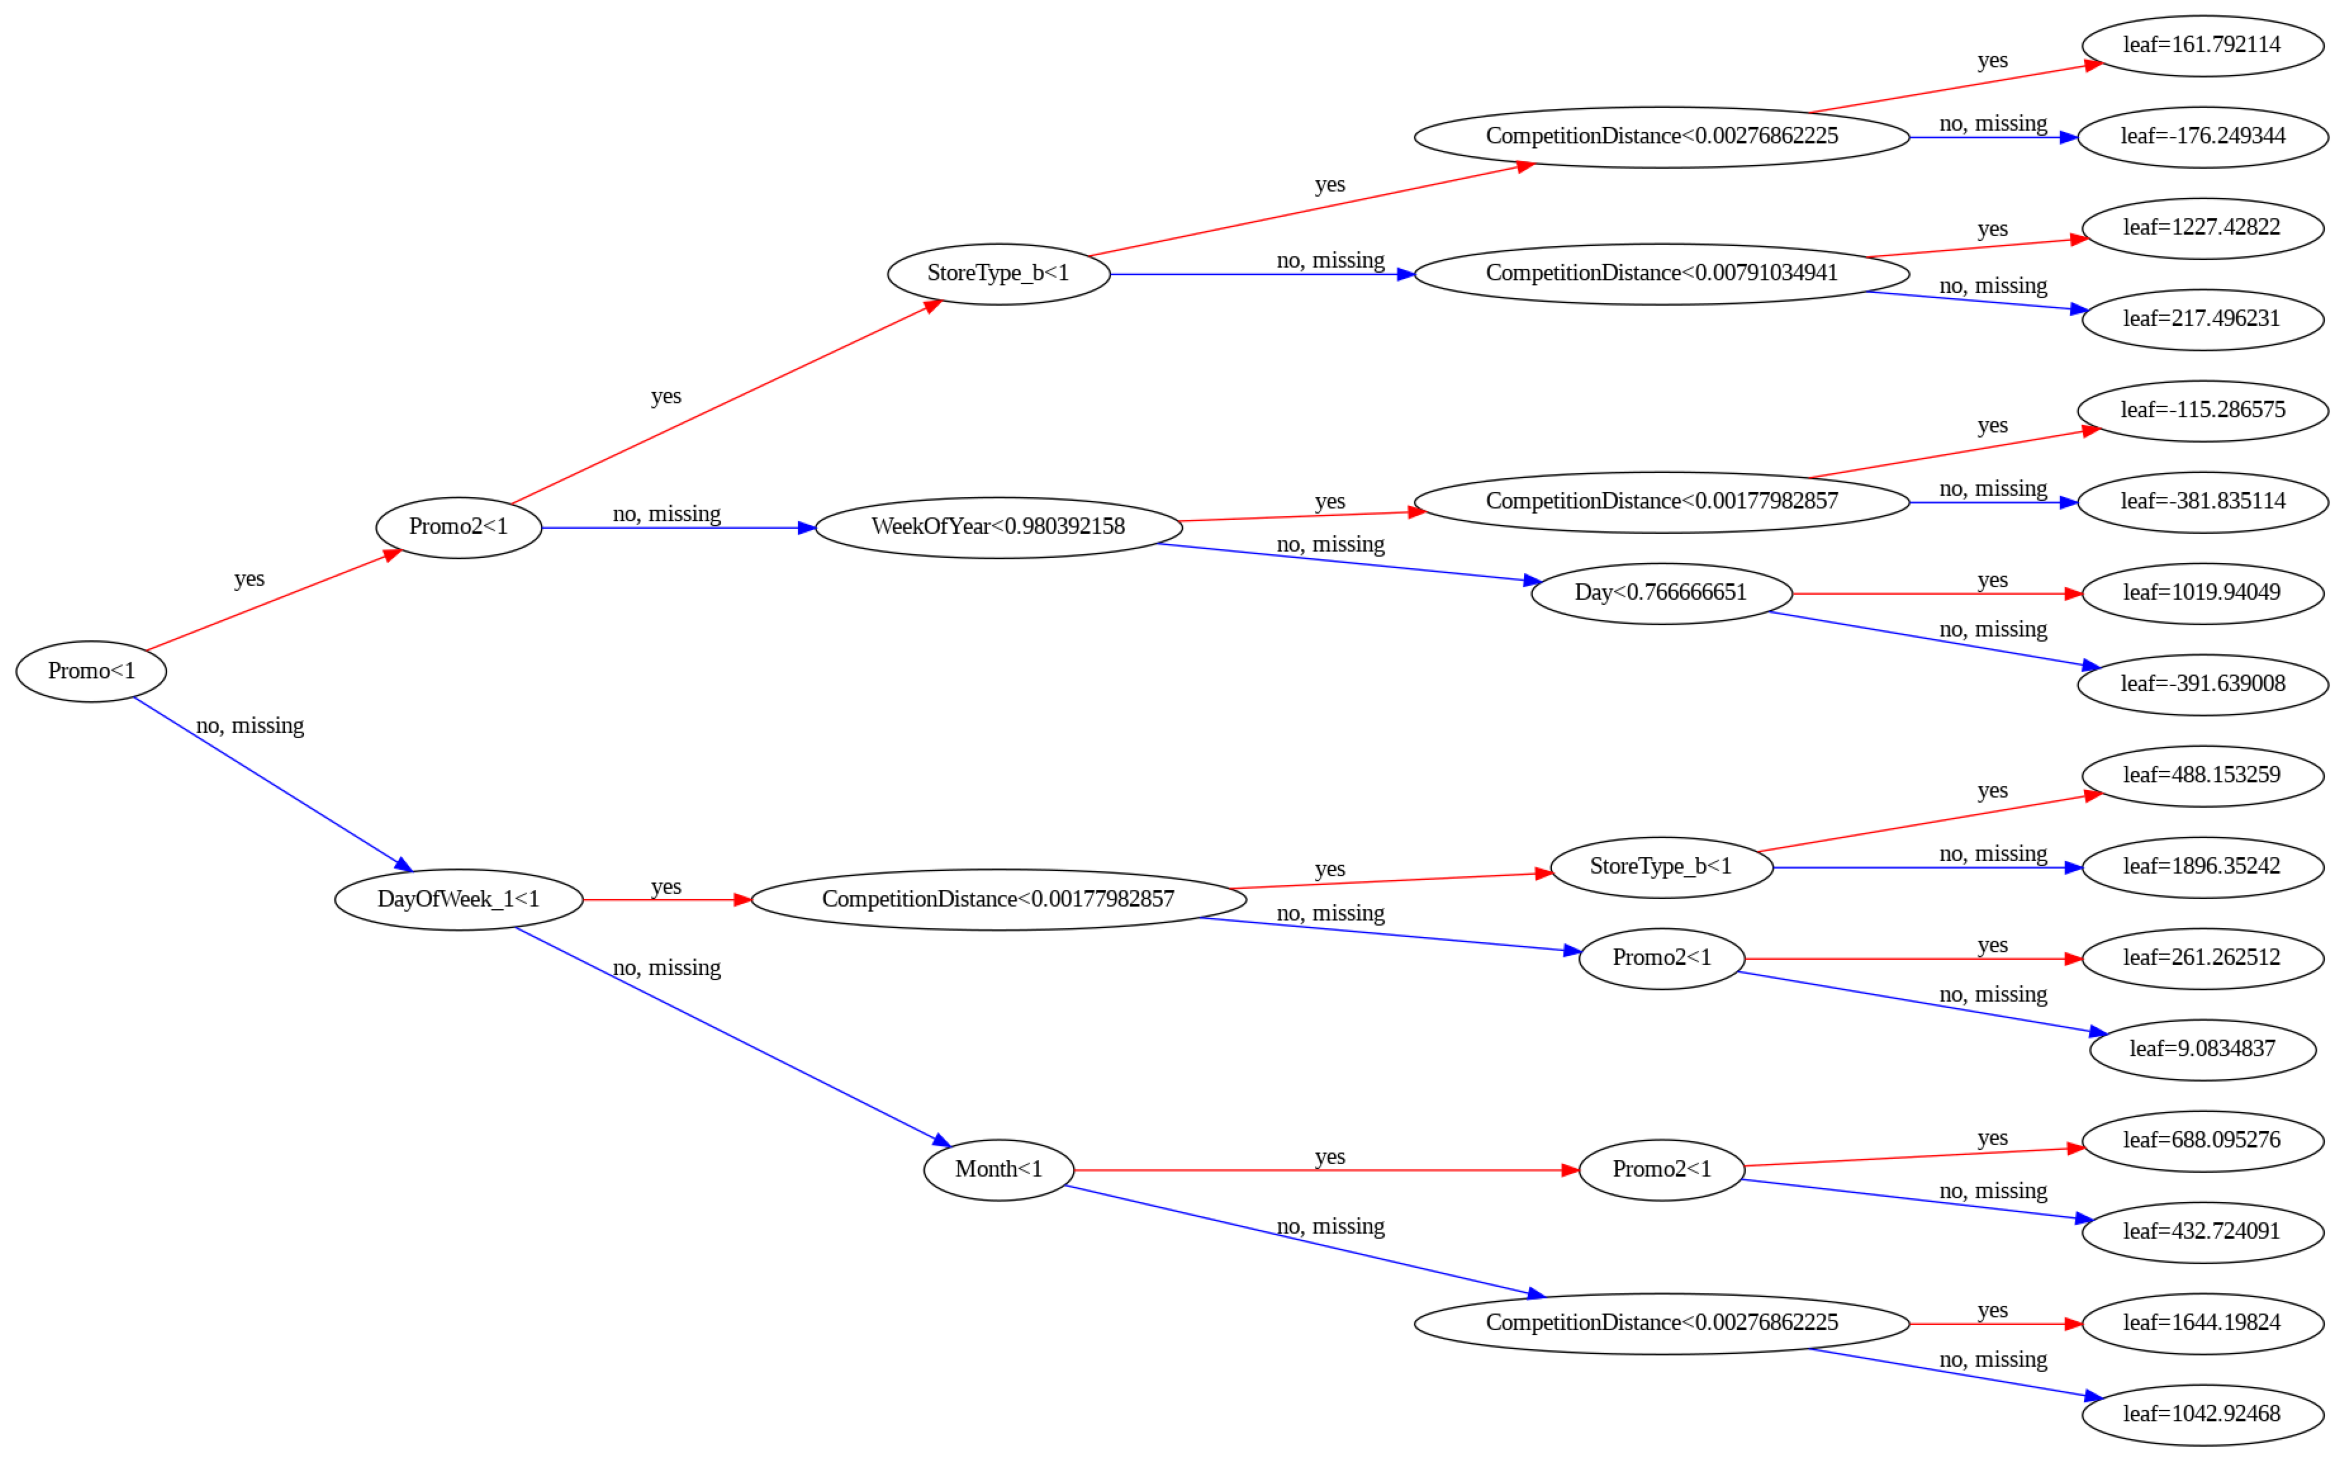

In [ ]:
plot_tree(model, rankdir='LR', num_trees=1);

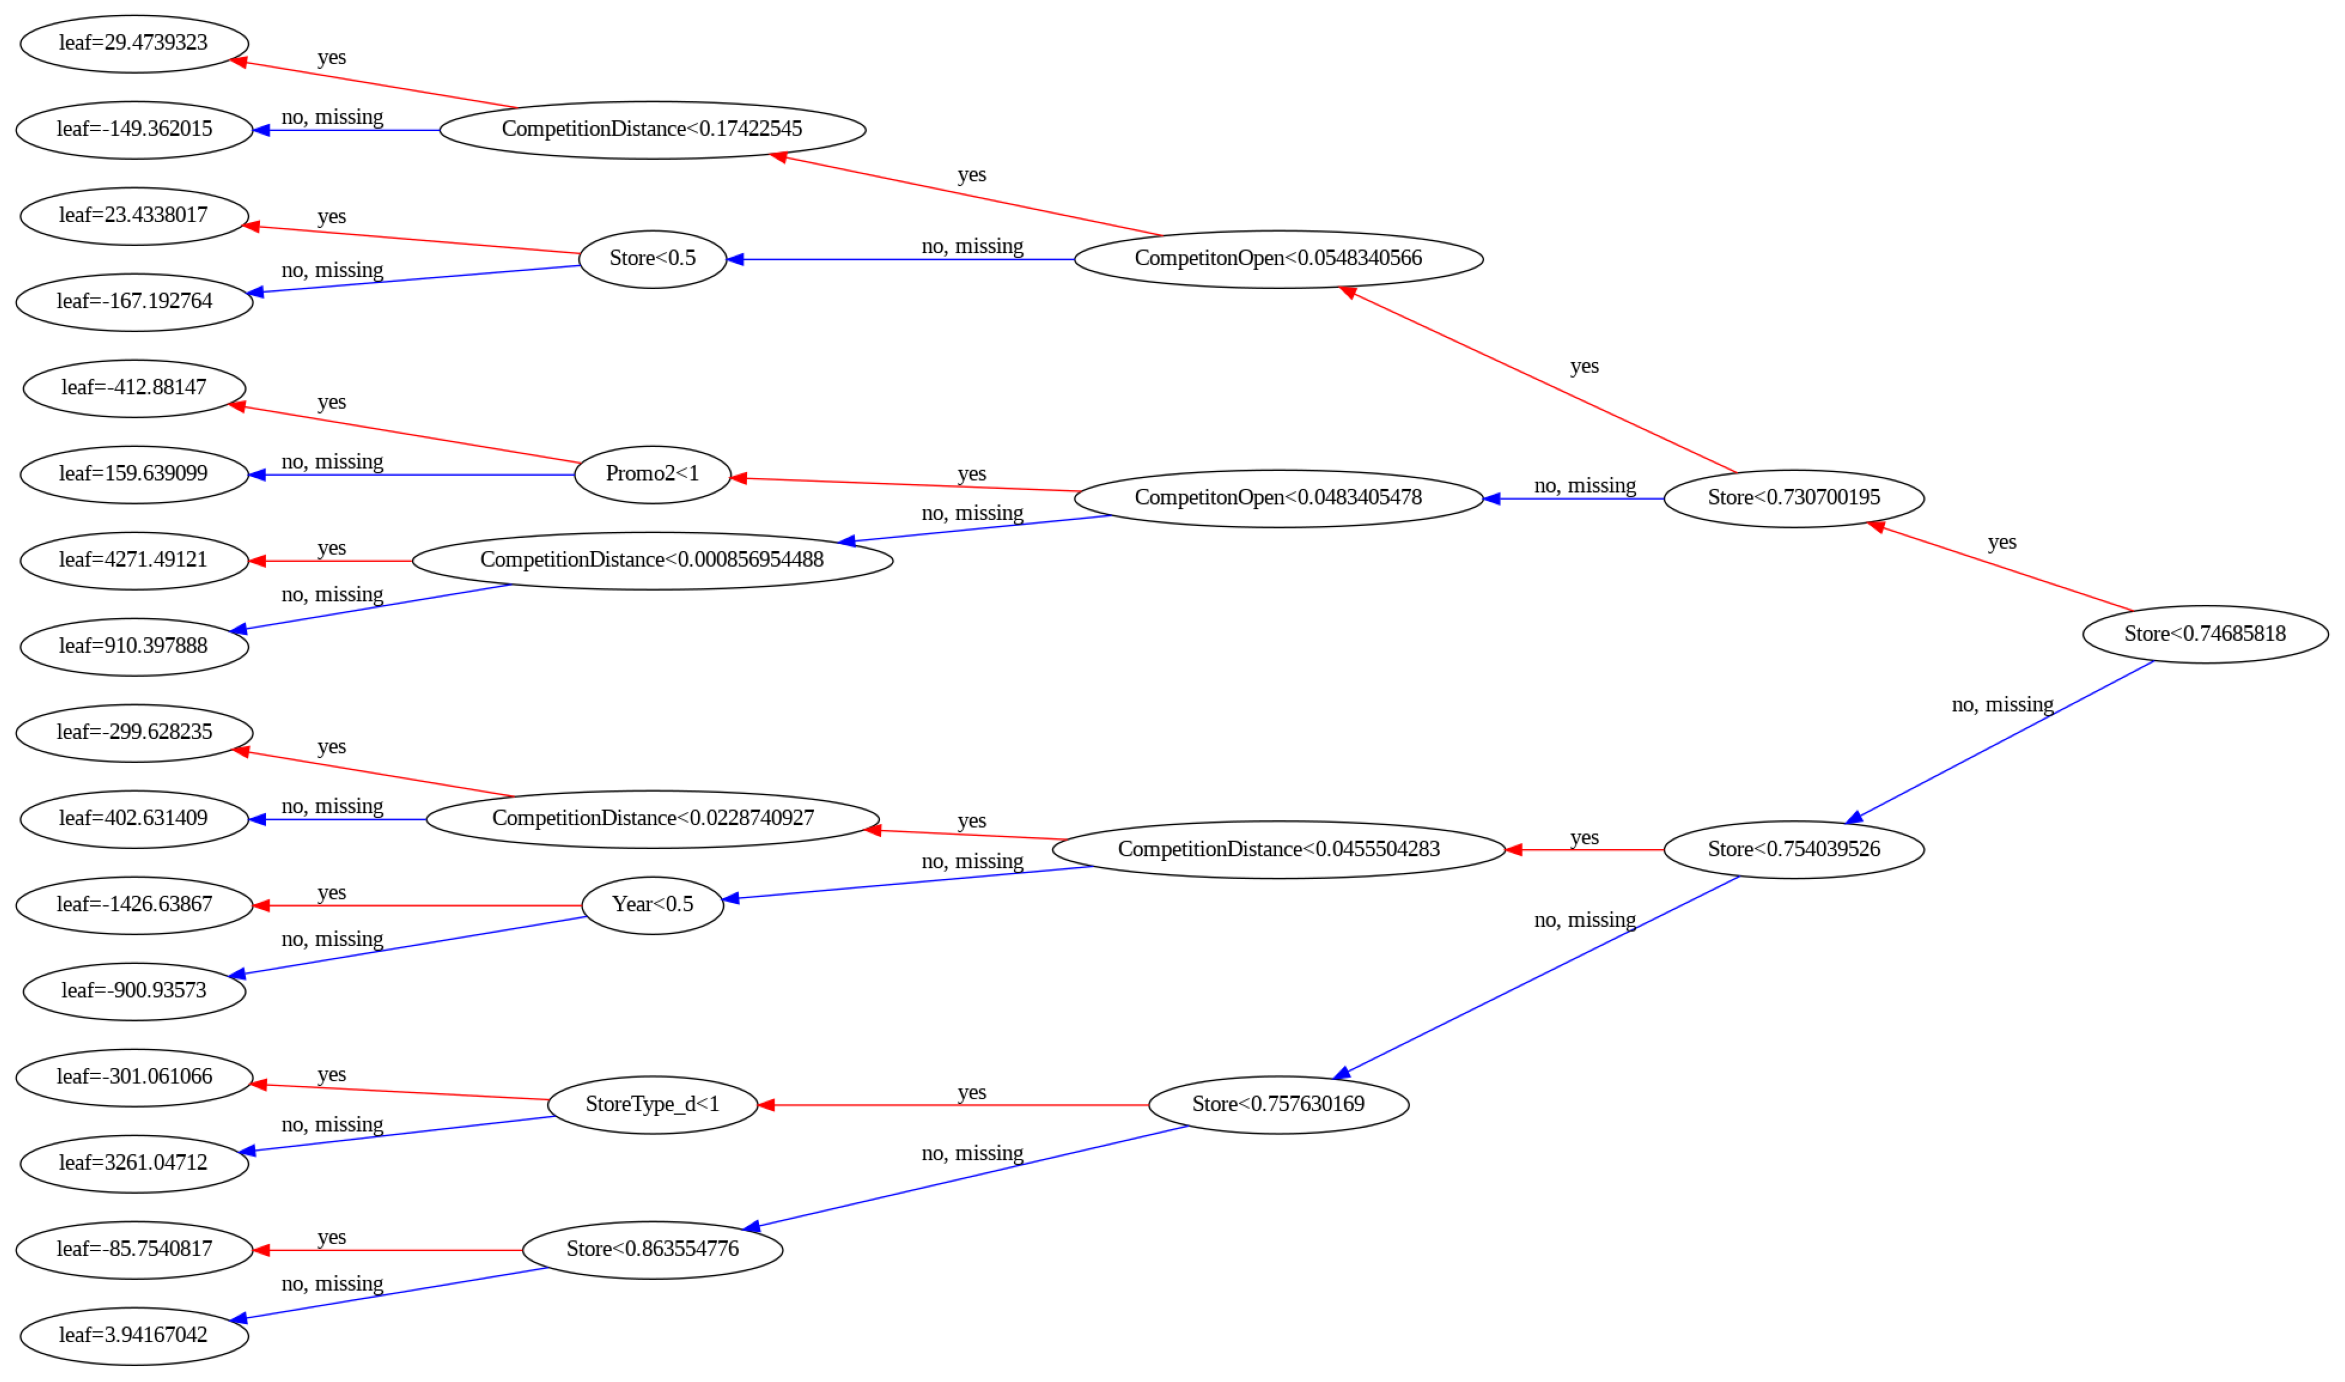

In [ ]:
plot_tree(model, rankdir='RL', num_trees=19);

In [ ]:
trees = model.get_booster().get_dump()
len(trees)

20

In [ ]:
importance_df = pd.DataFrame({
    'feature': X.columns,
    'importance' : model.feature_importances_
}).sort_values('importance', ascending = False)

In [ ]:
importance_df.head(10)

,feature,importance
19,Promo,0.309244
0,DayOfWeek_1,0.076455
14,StoreType_d,0.071732
12,StoreType_b,0.066487
23,Promo2,0.040491
21,CompetitionDistance,0.039816
15,Assortment_a,0.038316
13,StoreType_c,0.036829
22,CompetitonOpen,0.034157
27,Month,0.026813


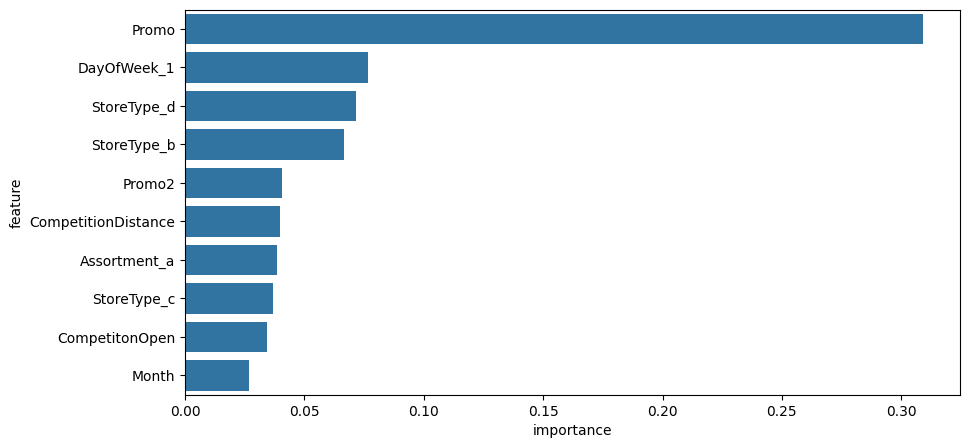

In [ ]:
import seaborn as sns
plt.figure(figsize = (10, 5))
sns.barplot(x = 'importance', y = 'feature', data = importance_df.head(10));

**K FOLD CROSS VALIDATION**

In [ ]:
def train_and_eval(X_train, train_target, val_train, val_target, **params):
  model = XGBRegressor(random_state = 42, n_jobs = -1, **params).fit(X_train, train_target)
  train_rmse = rmse(model.predict(X_train), train_target)
  val_rmse = rmse(model.predict(val_train), val_target)
  return model, train_rmse, val_rmse

In [ ]:
from sklearn.model_selection import KFold

In [ ]:
kfold = KFold(n_splits = 5)

In [ ]:
models = []
for train_idxs, val_idxs in kfold.split(X):
  X_train, train_targets = X.iloc[train_idxs], target.iloc[train_idxs]
  val_train, val_targets = X.iloc[val_idxs], target.iloc[val_idxs]
  model, train_rmse, val_rmse = train_and_eval(X_train, train_targets, val_train, val_targets, max_depth = 4, n_estimators = 20)
  models.append(model)
  print('Train RMSE: {}, Validation RMSE: {}'.format(train_rmse, val_rmse))


Train RMSE: 2370.7136430479463, Validation RMSE: 2448.0954941590503
Train RMSE: 2376.830658491627, Validation RMSE: 2420.3893349419886
Train RMSE: 2386.944071778845, Validation RMSE: 2364.856120007352
Train RMSE: 2348.3401652445446, Validation RMSE: 2460.4804735345797
Train RMSE: 2370.9691440768092, Validation RMSE: 2443.1601864801764


In [ ]:
import numpy as np

def predict_avg(models, inputs):
    return np.mean([model.predict(inputs) for model in models], axis=0)

In [ ]:
preds = predict_avg(models, X)

In [ ]:
preds

array([8013.9463, 7508.8916, 8623.156 , ..., 7844.056 , 7589.815 ,
       9704.449 ], dtype=float32)

**HYPER PARAMTER TUNING**

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train, X_val, train_targets, val_targets = train_test_split(X, target, test_size = 0.1, random_state = 42)

In [ ]:
def test_Params(**params):
  model = XGBRegressor(random_state = 42, n_jobs = -1, **params).fit(X_train, train_targets)
  train_rmse = rmse(model.predict(X_train), train_targets)
  val_rmse = rmse(model.predict(X_val), val_targets)
  print('train rmse: {}, val rmse: {}'.format(train_rmse, val_rmse))

**n_estimators**

In [ ]:
test_Params(n_estimators = 10)

train rmse: 2320.5814491784436, val rmse: 2333.0270213793956


In [ ]:
test_Params(n_estimators = 20);

train rmse: 1946.4472582846167, val rmse: 1956.9235681784533


In [ ]:
test_Params(n_estimators = 40);

train rmse: 1672.7544735607196, val rmse: 1686.4123686249989


In [ ]:
test_Params(n_estimators = 80);

train rmse: 1255.8509701436087, val rmse: 1270.0249970488796


In [ ]:
test_Params(n_estimators = 160);

train rmse: 996.0733968864275, val rmse: 1012.2192061073275


In [ ]:
test_Params(n_estimators = 320);

train rmse: 839.6670679409744, val rmse: 863.121097237


In [ ]:
test_Params(n_estimators = 640);

train rmse: 726.2032189828905, val rmse: 768.4194649846607


**n_estimators = 320**

In [ ]:
test_Params(max_depth = 2);

train rmse: 2379.9483307800515, val rmse: 2386.238454716508


In [ ]:
test_Params(max_depth = 5);

train rmse: 1384.8749123113917, val rmse: 1390.9790591042736


In [ ]:
test_Params(max_depth = 10);

train rmse: 661.1643544229491, val rmse: 761.0326035111349


**max_depth = 10**

In [ ]:
test_Params(learning_rate = 0.01);

train rmse: 2633.5035312262853, val rmse: 2648.3797983205786


In [ ]:
test_Params(n_estimators = 50, learning_rate = 0.1);

train rmse: 2183.3576032564765, val rmse: 2194.6052466264914


In [ ]:
test_Params(n_estimators = 50, learning_rate = 0.3);

train rmse: 1539.67925712263, val rmse: 1550.2069474484458


In [ ]:
test_Params(n_estimators = 50, learning_rate = 0.9);

train rmse: 1122.9768258576778, val rmse: 1133.274855867113


**learning rate = 0.9**

In [ ]:
test_Params(gamma = 2);

train rmse: 1151.792907400641, val rmse: 1166.1443584685678


**gamma = 2**

In [ ]:
test_Params(subsample  = 0.5)

train rmse: 1167.1257852616743, val rmse: 1179.3205467251255


In [ ]:
test_Params(subsample  = 0.9)

train rmse: 1185.7950667201194, val rmse: 1197.551598183492


In [ ]:
test_Params(n_estimators = 320, max_depth = 10, learning_rate = 0.9, subsample = 0.9)

train rmse: 394.6088370834894, val rmse: 835.5815002193766


In [ ]:
model = XGBRegressor(random_state = 42, n_jobs = -1, n_estimators = 320, max_depth = 10, learning_rate = 0.9, subsample = 0.9).fit(X, target)

In [ ]:
test_preds = model.predict(X_test)

In [ ]:
test_preds

array([ 3293.687,  7618.386,  9467.355, ...,  5449.104, 21663.71 ,
        5284.288], dtype=float32)

In [ ]:
submission_df

,Id,Sales
0,1,0
1,2,0
2,3,0
3,4,0
4,5,0
...,...,...
41083,41084,0
41084,41085,0
41085,41086,0
41086,41087,0


In [ ]:
submission_df['Sales'] = test_preds

In [ ]:
submission_df['Sales'] = submission_df['Sales'] * test_df.Open.fillna(1.)

In [ ]:
submission_df

,Id,Sales
0,1,3293.687012
1,2,7618.386230
2,3,9467.355469
3,4,7010.070801
4,5,6162.875000
...,...,...
41083,41084,4309.958984
41084,41085,8068.377930
41085,41086,5449.104004
41086,41087,21663.710938


In [ ]:
submission_df.to_csv('submission.csv', index = None)